## Evaluation Project - Avacado Dataset

#### Information about dataset

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the city or region and find the average price .

Task: Classification /Regression

In [1]:
#Importing the required libraries for the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter("ignore")

In [2]:
#loading the dataset
rs = pd.read_csv("avacado.csv")
rs

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


In [3]:
rs.head()  # this gives us the first five rows of the dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
rs.sample()  #it gives us a random sample of the dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1114,33,10-05-2015,1.25,218562.94,125846.03,33050.99,42.85,59623.07,59620.93,0.0,2.14,conventional,2015,StLouis


In [5]:
rs.tail()  #it gives us the last five rows of dataset

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte
1516,14,18-09-2016,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016,Charlotte


In [6]:
rs.shape   #to check the dimension of the dataset

(1517, 14)

In [7]:
rs.info()  #info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [8]:
rs.dtypes #to check the datatypes of datatset

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

###there are 2 categorical columns (type,region) and 9 numeric columns (average price,total volume,4046,4225,4770,total bags,small bags,large bags,xlarge bags)
###and we have to convert date column in date type .

In [9]:
rs.isnull().sum()  #to check null values

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#there are no null values present in the dataset.

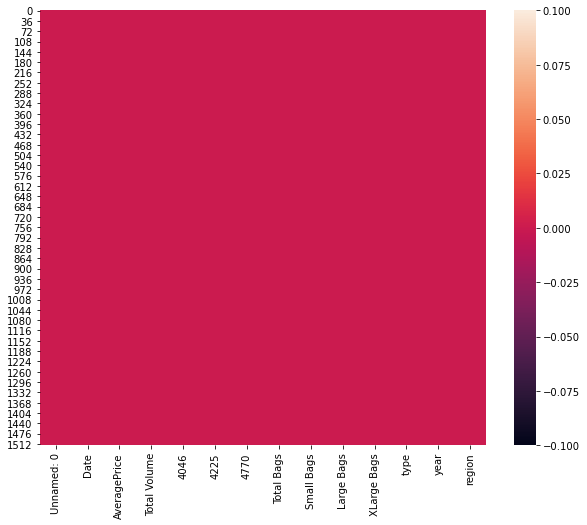

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(rs.isnull())
plt.show()

#checking for null values graphically using heatmap.

In [11]:
#summary statistics
rs.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


#there no missing values in the dataset.
#in all columns except average price,mean is greter than median value.
#there is high range in 75% and max value of Xlarge bags.

In [12]:
#we can drop the unnamed columns because they are just the index values and not affect our dataset
rs.drop("Unnamed: 0",axis=1,inplace=True)

In [13]:
rs.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [14]:
#converting the date column into date data type as it is in object datatype.
rs['Date']= pd.to_datetime(rs['Date'])

In [15]:
#checking dtypes again
rs.dtypes


Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [16]:
print(rs['type'].unique())
rs['type'].nunique()

['conventional']


1

In [17]:
#there is only one type of avacado that is "conventional". we can drop  this column as it will not effect our dataset.

In [18]:
rs.drop("type",axis=1,inplace= True)

In [19]:
print(rs['region'].unique())

rs['region'].nunique()

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'Columbus'
 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewYork' 'Northeast' 'NorthernNewEngland'
 'Orlando' 'Philadelphia' 'PhoenixTucson' 'Pittsburgh' 'Plains' 'Portland'
 'RaleighGreensboro' 'RichmondNorfolk' 'Roanoke' 'SanDiego' 'SanFrancisco'
 'Seattle' 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis'
 'Syracuse' 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


51

#there are 51 regions in the dataset

In [20]:
ad = rs.groupby(['region','year'])["Total Volume"].sum()
ad

region               year
Albany               2015    3.962854e+06
                     2016    1.148589e+06
Atlanta              2015    1.707703e+07
                     2016    8.175373e+06
BaltimoreWashington  2015    3.177335e+07
                     2016    2.072352e+07
Boise                2015    1.887500e+06
                     2016    3.380501e+06
Boston               2015    8.195407e+06
                     2016    2.611903e+07
BuffaloRochester     2015    8.935309e+05
                     2016    5.847872e+06
California           2015    1.411930e+08
                     2016    3.174880e+08
Charlotte            2015    3.080092e+06
                     2016    2.384531e+06
Chicago              2015    1.867329e+07
Columbus             2015    6.850740e+06
DallasFtWorth        2015    2.032117e+07
Denver               2015    1.722244e+07
Detroit              2015    1.356261e+07
GrandRapids          2015    4.390393e+06
GreatLakes           2015    5.897445e+07
Harrisbu

#here we are checking for the total volume of avacados sold wrt to region and year.

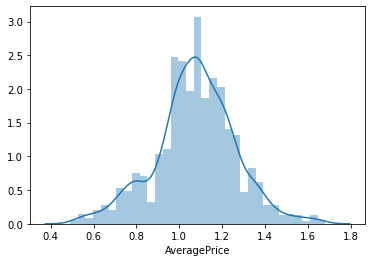

In [21]:
sns.distplot(rs['AveragePrice'])

#the average distribution of avacado price. it lies between 1 to 1.2.

Text(0.5, 1.0, 'Average Price')

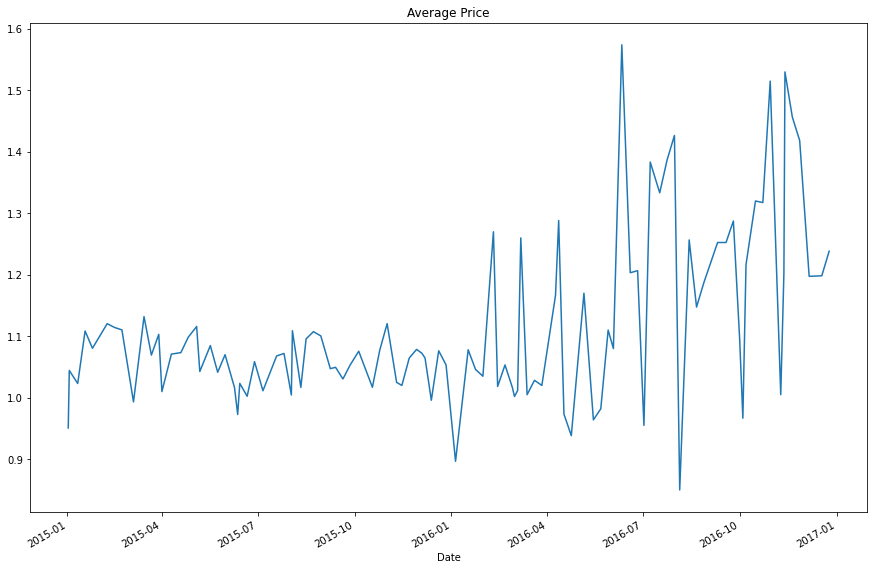

In [22]:
#we are plotting the graph for time series of average price of avacado.
bdg=rs.groupby('Date').mean()
plt.figure(figsize=(15,10))
bdg['AveragePrice'].plot()
plt.title('Average Price')

#there is increse in the average price of avacado after 2016-04 to before 2016-07. it has again increased after 2016-10.

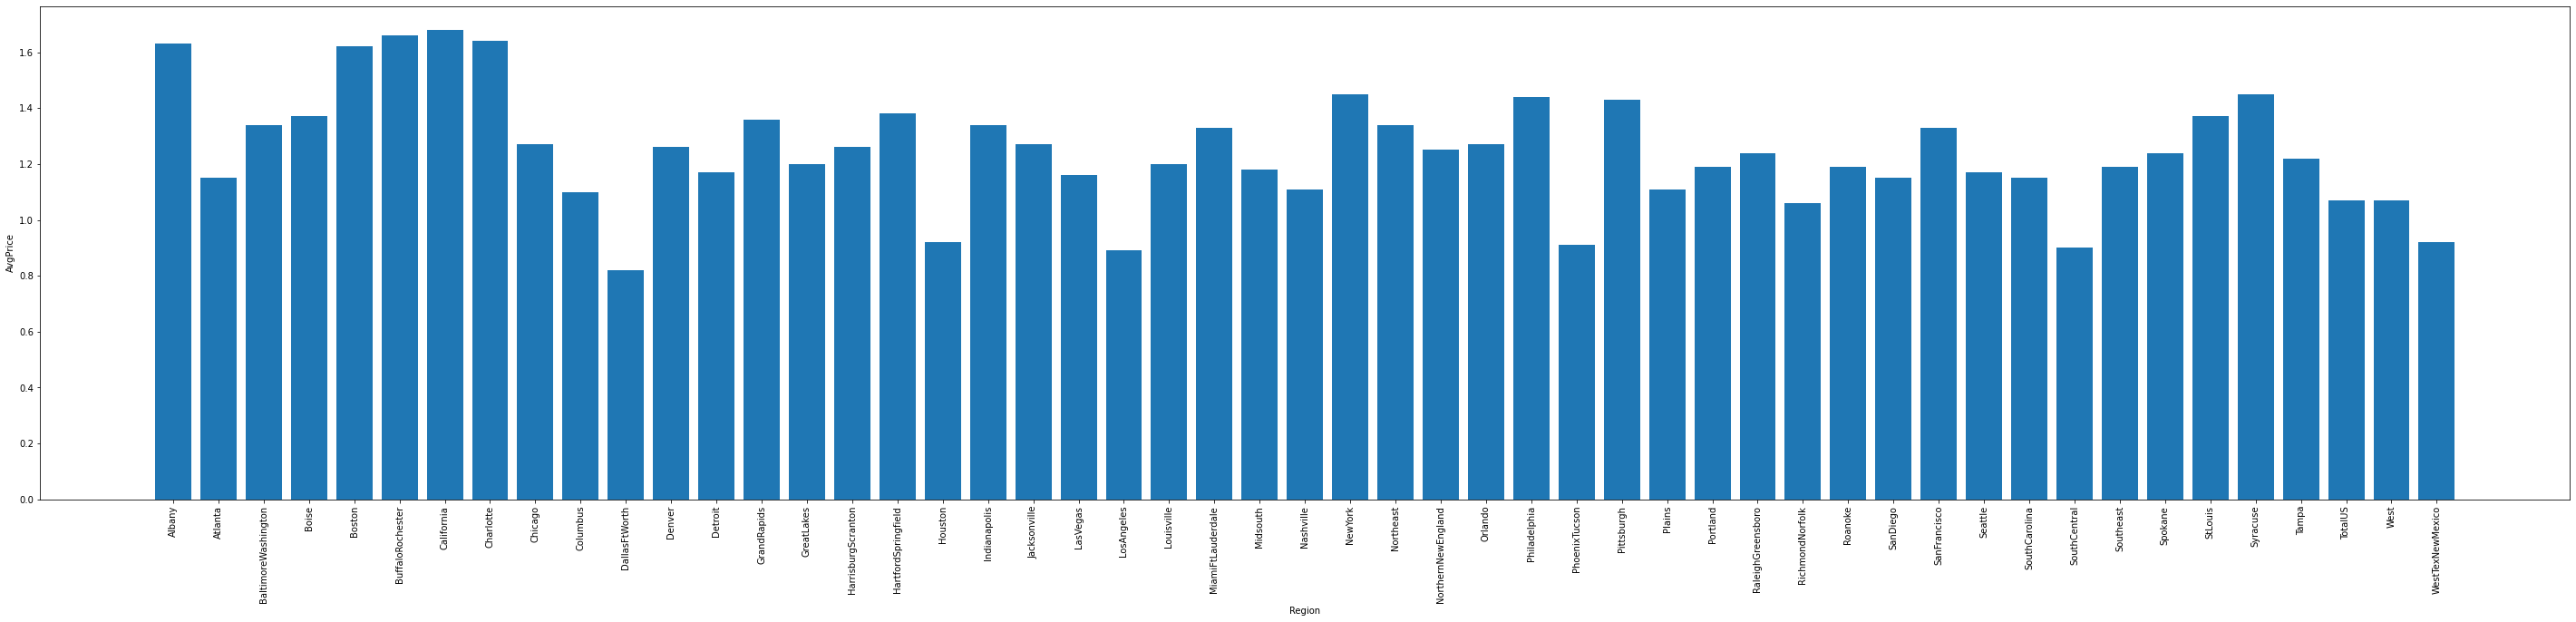

In [23]:
plt.figure(figsize = (50,10))
plt.bar( 'region', rs['AveragePrice'],data= rs)
plt.xlabel("Region")
plt.ylabel("AvgPrice")
plt.xticks(rotation=90)
plt.show()

#these are the region where the average price of avacado is high.
1.California,2.Buffalorochester,3.Charlotte,4.Boston.5.Albony

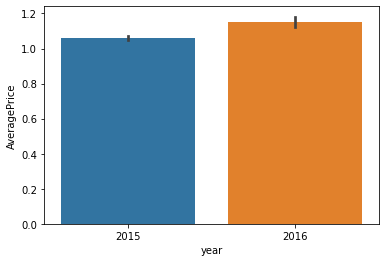

In [24]:
sns.barplot(x='year',y = "AveragePrice",data = rs)

#this shows that year 2016 has the max average price for avacado

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text major ticklabel objects>)

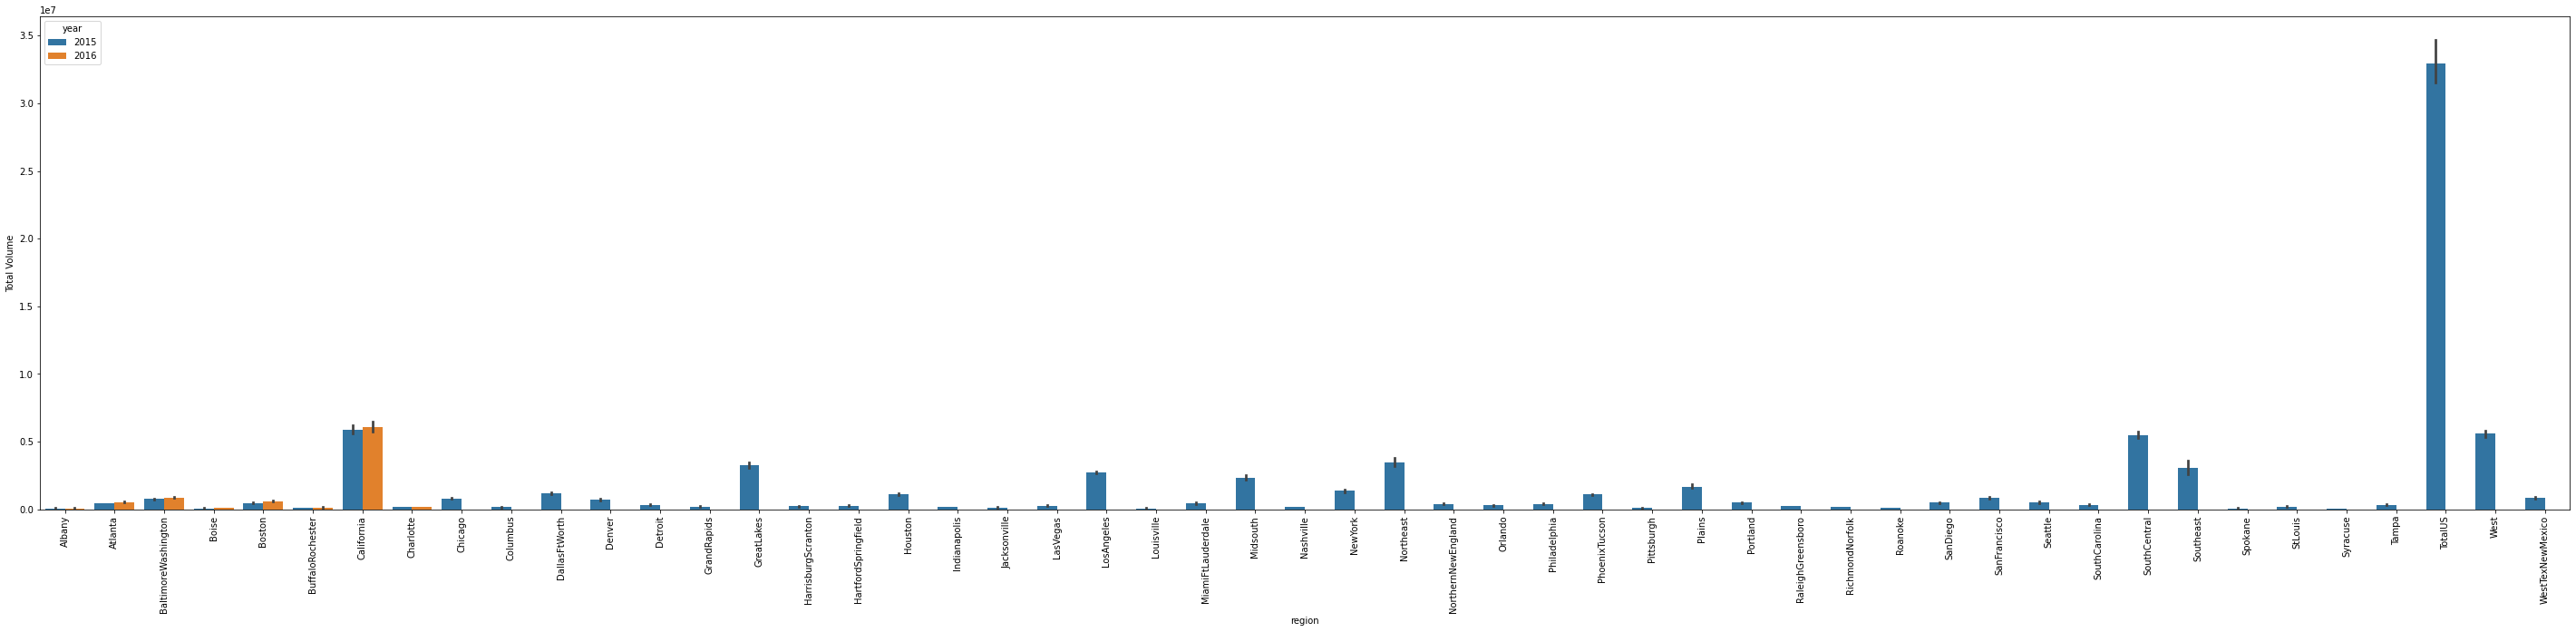

In [25]:
plt.figure(figsize=(50,10))
sns.barplot(x='region',y = "Total Volume",hue = 'year',data = rs)
plt.xticks(rotation = 90)

In [26]:
#this shows that total volume of avacado sold was max in the year 2015 and region was Total US.

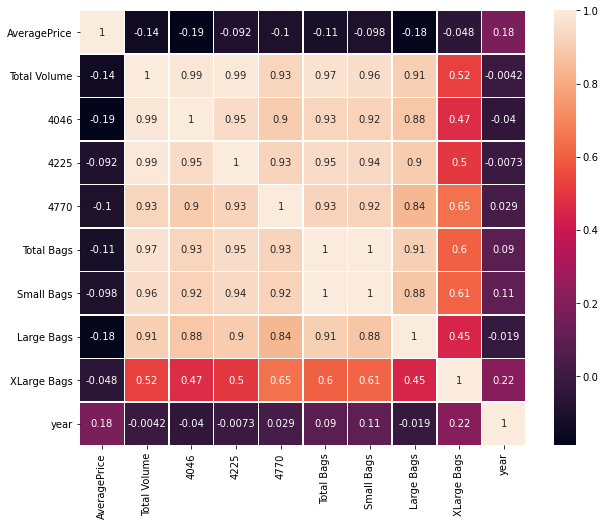

In [27]:
rscorr = rs.corr()
plt.figure(figsize=(10,8))
sns.heatmap(rscorr,annot = True,linewidth = 0.5)

#From the heatmap above we can say that, all the features are weakly correleted with the Average Price which is our target.
#most of the features are correlated to each other. 


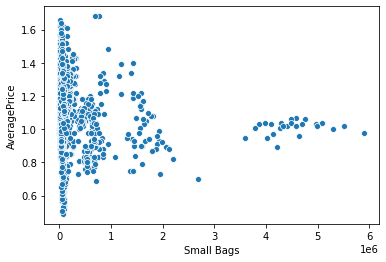

In [28]:
#relationship between the small bags and average price.
sns.scatterplot(x='Small Bags',y='AveragePrice',data=rs)

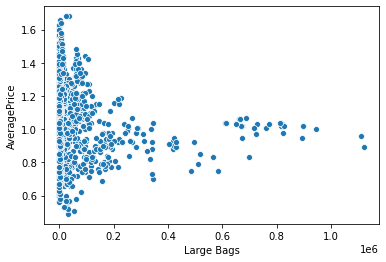

In [29]:
#relationship between the large bags and average price.
sns.scatterplot(x='Large Bags',y='AveragePrice',data=rs)

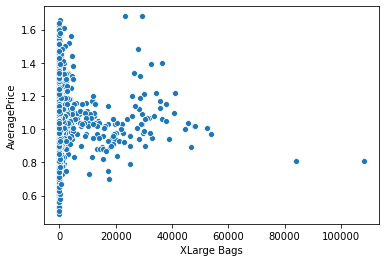

In [30]:
#relationship between the Xlarge bags and average price.
sns.scatterplot(x='XLarge Bags',y='AveragePrice',data=rs)

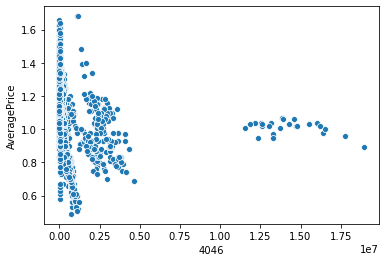

In [31]:
#relationship between the 4046 and average price.
sns.scatterplot(x='4046',y='AveragePrice',data=rs)

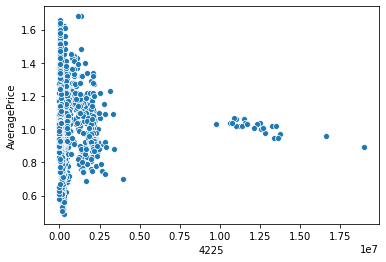

In [32]:
#relationship between the 4225 and average price.
sns.scatterplot(x='4225',y='AveragePrice',data=rs)

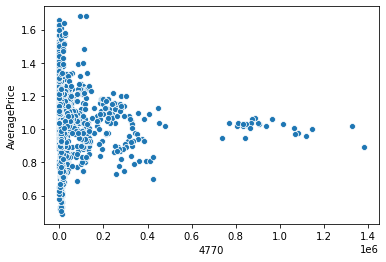

In [33]:
#relationship between the 4770 and average price.
sns.scatterplot(x='4770',y='AveragePrice',data=rs)

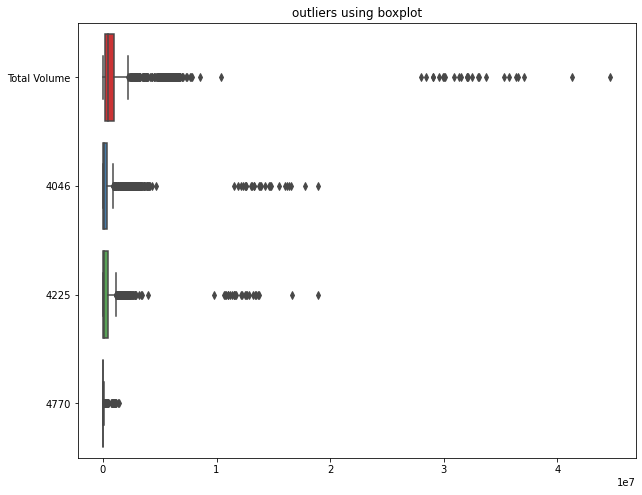

In [34]:
#plotting boxplot
plt.figure(figsize=(10,8))
sns.boxplot(data = rs[["Total Volume","4046","4225","4770"]],orient = 'h', palette = 'Set1')
plt.title("outliers using boxplot")
plt.show()

#here we can see there are outliers in total volume,4046,4225,4770. still we will validate further.

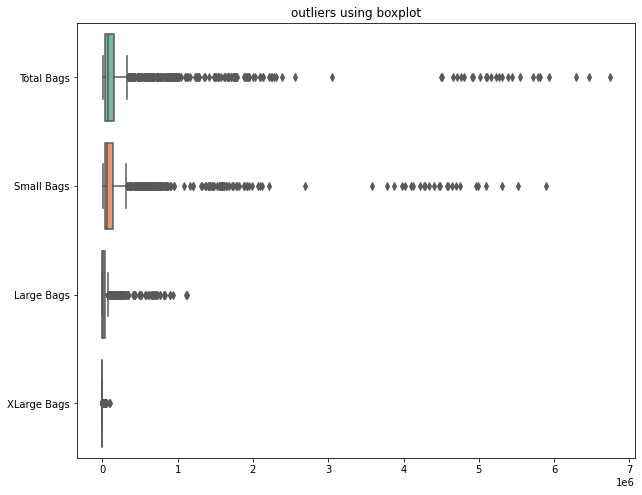

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(data = rs[["Total Bags","Small Bags","Large Bags","XLarge Bags"]],orient = 'h', palette = 'Set2')
plt.title("outliers using boxplot")
plt.show()

In [36]:
collist = ['AveragePrice', 'Total Volume', '4046', '4225', '4770',
           'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']
ncols = 14
nrows = 15

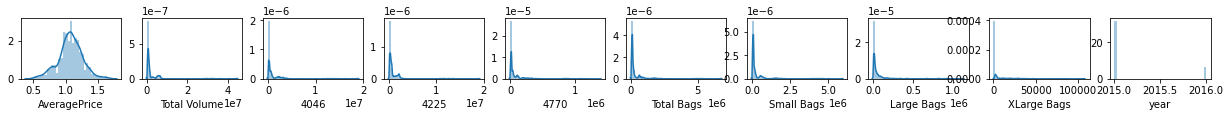

In [37]:
plt.figure(figsize=(30,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sns.distplot(rs[collist[i]])

#from above we can see that average  price is normally distributed and all other features are left skewed.

In [38]:
rs.columns.values

array(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region'], dtype=object)

In [39]:
#we convert categorical dtype region into numeric type using label encoder.
from sklearn.preprocessing import LabelEncoder

In [40]:
le=LabelEncoder()
for c in rs.columns:
    rs[c] = le.fit_transform(rs[c])

In [41]:
rs.skew()

Date            0.961779
AveragePrice   -0.120069
Total Volume    0.000000
4046            0.000000
4225            0.000000
4770            0.000674
Total Bags      0.000000
Small Bags      0.000000
Large Bags      0.066667
XLarge Bags     1.024596
year            1.828332
region          0.288146
dtype: float64

In [42]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(rs))
threshold = 3
new_rs = rs[(z<3).all(axis=1)]

In [43]:
rs.shape

(1517, 12)

In [44]:
new_rs.shape

(1515, 12)

In [45]:
#only 2 rows are removed as outliers, so perceentage data loss is very low. so we can proceed with zscore. 

#### Prediction using AveragePrice

##### Preparing the dataset for model training

In [46]:
x = new_rs.drop(columns=['Date',"AveragePrice"])
y = new_rs['AveragePrice']

In [47]:
print(x.shape)
print(y.shape)

(1515, 10)
(1515,)


In [48]:
#removing skewness
from sklearn.preprocessing import power_transform
x = power_transform(x, method = 'yeo-johnson')

##### model building

In [49]:
#Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledx = sc.fit_transform(x)

In [50]:
#finding the best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [51]:
best_rstate = 0
accu = 0
for i in range (30,200):
    x_train,x_test,y_train,y_test = train_test_split(scaledx,y,test_size = 0.2,random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    tempaccu = r2_score(y_test,y_pred)
    if tempaccu > accu:
        accu = tempaccu
        best_rstate = i
        
        
print(f"Best accuracy : {accu*100} found on random state :{best_rstate}")

Best accuracy : 43.52645370734268 found on random state :79


In [52]:
#creating train test split using best random state
x_train,x_test,y_train,y_test = train_test_split(scaledx,y,test_size = .2,random_state =79)

###### finding Best Model

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(lr,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 43.52645370734268, cross_val_score : 30.87988483734499 & differnece : 12.646568869997694


In [54]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(rf,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 85.65128408538683, cross_val_score : 80.71966286678253 & differnece : 4.931621218604306


In [55]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(x_train,y_train)
y_pred = sgd.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(sgd,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & difference : {(r2score*100)-(cvscore*100)}")

Accuracy : 43.05613213257281, cross_val_score : 30.41447050647399 & difference : 12.641661626098823


In [56]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
y_pred = adb.predict(x_test)
r2score = r2_score(y_test,y_pred)
cvscore = cross_val_score(adb,x_train,y_train,cv=5).mean()
print(f"Accuracy : {r2score*100}, cross_val_score : {cvscore*100} & differnece : {(r2score*100)-(cvscore*100)}")

Accuracy : 60.900483725254915, cross_val_score : 59.28665470506165 & differnece : 1.6138290201932648


#we can select Random Forest Regressor as our best model

##### Hperparameter tuning

In [57]:
#create a list of parameters to pass in GridSearchCV
parameters = {"n_estimators":[10,20,30,40,50,60,70,80,90,100,150],
             "criterion": ["mse", 'mae']}

In [58]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(rf,parameters,cv=5,scoring ='r2')  # intializing GCV
gcv.fit(x_train,y_train)
gcv.best_estimator_   #finding best estimator
gcv_pred = gcv.best_estimator_.predict(x_test)  #predicting the value using best estimator found by GridSearchCV
print("Accuracy score: ", r2_score(y_test,gcv_pred)*100)

Accuracy score:  85.2200122626688


#using hyperparameter tuning we have achieved accuracy of 85.42%.


##### Prediction using Region as a target 

#here we use classifiers as the target is of categorical.

In [59]:
x_c = new_rs.drop(columns=["Date","region"])
y_c = new_rs['region']

In [60]:
print(x_c.shape)
print(y_c.shape)

(1515, 10)
(1515,)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [62]:
#Scaling the data using StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaledx_c = sc.fit_transform(x_c)

In [63]:
model = [LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier()]

In [64]:
#finding which best model suits the dataset
max_acc_score = 0
for r_state in range(30,200):
    x_train,x_test,y_train,y_test = train_test_split(scaledx_c,y_c,random_state = r_state,test_size = 0.2)
    for i in model:
        i.fit(x_train,y_train)
        pred = i.predict(x_test)
        acc = accuracy_score(y_test,pred)
        if acc > max_acc_score:
            max_acc_score = acc
            final_state = r_state
            final_model = i
            

print("max accuracy score correspond to random state", final_state,"is ", max_acc_score, "and model is ",final_model)

max accuracy score correspond to random state 67 is  0.9867986798679867 and model is  KNeighborsClassifier()


In [65]:
x_train,x_test,y_train,y_test = train_test_split(scaledx_c,y_c,test_size = .2,random_state =67)

In [66]:
#Hyperparameter tuning
KNC = KNeighborsClassifier()
parameters = {'n_neighbors' : range(1,10)}
gcv = GridSearchCV(KNC,parameters)
gcv.fit(x_train,y_train)
gcv.best_params_

{'n_neighbors': 1}

In [67]:
KNC = KNeighborsClassifier(n_neighbors = 1)
KNC.fit(x_train,y_train)
pred = KNC.predict(x_test)
acc_score = accuracy_score(y_test,pred)
print("Accuracy score :",acc_score*100)

Accuracy score : 97.6897689768977


In [68]:
s = cross_val_score(KNC,scaledx_c,y_c,cv= 5,scoring = 'accuracy')
print("cross_val_score :", s*100)
print("mean score :", s.mean()*100)
print("std score :", s.std()*100)

cross_val_score : [86.79867987 92.73927393 97.68976898 94.38943894 93.72937294]
mean score : 93.06930693069306
std score : 3.548430377746699


###### ROC_AUC Curve

In [69]:
pred_prob = KNC.predict_proba(x_test)[:,1]
pred_prob

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 0.

In [70]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label = True)

In [71]:
print(fpr)

print(tpr)

print(thresholds)

[0.         0.00348432 1.        ]
[0.     0.9375 1.    ]
[2. 1. 0.]


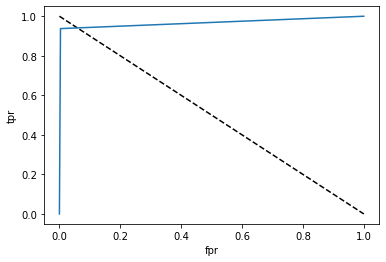

In [72]:
#plotting the roc curve
plt.plot([0,1],[1,0],"k--")
plt.plot(fpr,tpr,label = KNeighborsClassifier)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

#the best model choosen for region as target is KNN.

In [73]:
import joblib
joblib.dump(KNC,"avacado.pkl")

['avacado.pkl']